In [138]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv', index_col=['Id'])
data = pd.DataFrame(data)

data.dropna(axis=0,subset=['SalePrice'], inplace=True)
X_full=data.drop(['SalePrice'], axis=1)
y=data.SalePrice.copy()


cat_cols = [col for col in X_full.columns if X_full[col].dtype == 'object']
num_cols = [col for col in X_full.columns if X_full[col].dtype in ['float64', 'int64']]

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_fill = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(X_full[cat_cols]),
                        columns = X_full[cat_cols].columns)
cat_encode = pd.get_dummies(cat_fill, columns = cat_fill.columns)

num_fill = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X_full[num_cols]),
                        columns = X_full[num_cols].columns)

new_x = num_fill.join(cat_encode)


X_train, X_valid, y_train, y_valid = train_test_split(new_x, y, train_size=0.8, test_size=0.2,random_state=1)


In [143]:
data.MSSubClass = data.MSSubClass.astype(str)
fill_not_cols = ['Alley', 'PoolQC','Fence', 'MiscFeature']
age_cols = ['YearBuilt','YearRemodAdd','GarageYrBlt']
drop_cols = ['BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea', 'MoSold']
data['Age'] = data.YrSold - data.YearBuilt
data['AgeRenow'] = data.YrSold - data.YearRemodAdd
data['AgeGar'] = data.YrSold - data.GarageYrBlt

X_full=data.drop(['SalePrice', 'YearBuilt','YearRemodAdd','GarageYrBlt'], axis=1)
X_full.drop(drop_cols, axis=1, inplace=True)
y=data.SalePrice.copy()


cat_cols = [col for col in X_full.columns if X_full[col].dtype == 'object']
num_cols = [col for col in X_full.columns if X_full[col].dtype in ['float64', 'int64']]


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer

fill_not = pd.DataFrame(SimpleImputer(strategy='constant', fill_value=str('not')).fit_transform(X_full[fill_not_cols]),
                        columns = X_full[fill_not_cols].columns)

cat_fill = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(X_full[cat_cols]),
                        columns = X_full[cat_cols].columns)
cat_encode = pd.DataFrame(OrdinalEncoder().fit_transform(cat_fill), columns = cat_fill.columns)

num_fill = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X_full[num_cols]),
                        columns = X_full[num_cols].columns)

new_x = num_fill.join(cat_encode)


X_train, X_valid, y_train, y_valid = train_test_split(new_x, y, train_size=0.8, test_size=0.2,random_state=1, shuffle=True)

mms=MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_valid = mms.transform(X_valid)

In [146]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
#    layers.BatchNormalization(),

n=512
model_NN = keras.Sequential([
    layers.Input(X_train.shape[1]),
    layers.Dropout(0.05),
    layers.Dense(n, activation='relu'),
    layers.Dropout(0.05),
    layers.Dense(n*2,activation='relu'),
    layers.Dropout(0.05),
    layers.Dense(n, activation='relu'),
    layers.Dropout(0.05),
    layers.Dense(1, activation='relu'),
])

#early_stopping = keras.callbacks.EarlyStopping(patience=500, min_delta=0.001,      restore_best_weights=True)


model_NN.compile(optimizer='adam', loss='mse', metrics='mean_absolute_error')

history = model_NN.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    batch_size=300,
                    epochs=1000,
                    verbose=1)

              
history_df = pd.DataFrame(history.history)

Epoch 1/1000
4/4 [==============================] - 1s 76ms/step - loss: 39290871808.0000 - mean_absolute_error: 182204.9531 - val_loss: 38023593984.0000 - val_mean_absolute_error: 175760.1562
Epoch 2/1000
4/4 [==============================] - 0s 44ms/step - loss: 39282421760.0000 - mean_absolute_error: 182181.8281 - val_loss: 38005620736.0000 - val_mean_absolute_error: 175708.8438
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 39253118976.0000 - mean_absolute_error: 182100.7500 - val_loss: 37953380352.0000 - val_mean_absolute_error: 175559.7812
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 39177089024.0000 - mean_absolute_error: 181890.0781 - val_loss: 37831995392.0000 - val_mean_absolute_error: 175213.2031
Epoch 5/1000
4/4 [==============================] - 0s 15ms/step - loss: 39010566144.0000 - mean_absolute_error: 181431.3125 - val_loss: 37586034688.0000 - val_mean_absolute_error: 174509.6250
Epoch 6/1000
4/4 [=================

Epoch 44/1000
4/4 [==============================] - 0s 14ms/step - loss: 3910445056.0000 - mean_absolute_error: 45083.8477 - val_loss: 4465223680.0000 - val_mean_absolute_error: 46410.3125
Epoch 45/1000
4/4 [==============================] - 0s 14ms/step - loss: 3843991296.0000 - mean_absolute_error: 44652.1406 - val_loss: 4352509952.0000 - val_mean_absolute_error: 45459.2500
Epoch 46/1000
4/4 [==============================] - 0s 14ms/step - loss: 3795195136.0000 - mean_absolute_error: 43869.4102 - val_loss: 4242991872.0000 - val_mean_absolute_error: 44808.5898
Epoch 47/1000
4/4 [==============================] - 0s 14ms/step - loss: 3646473472.0000 - mean_absolute_error: 42991.5703 - val_loss: 4132288000.0000 - val_mean_absolute_error: 44111.7188
Epoch 48/1000
4/4 [==============================] - 0s 14ms/step - loss: 3537083648.0000 - mean_absolute_error: 42159.1484 - val_loss: 4019064320.0000 - val_mean_absolute_error: 43193.9141
Epoch 49/1000
4/4 [==============================]

4/4 [==============================] - 0s 16ms/step - loss: 1365144832.0000 - mean_absolute_error: 23522.6348 - val_loss: 1192148992.0000 - val_mean_absolute_error: 19602.6504
Epoch 131/1000
4/4 [==============================] - 0s 16ms/step - loss: 1325801728.0000 - mean_absolute_error: 23365.2930 - val_loss: 1203989632.0000 - val_mean_absolute_error: 19543.2559
Epoch 132/1000
4/4 [==============================] - 0s 16ms/step - loss: 1293836928.0000 - mean_absolute_error: 22901.9062 - val_loss: 1199669760.0000 - val_mean_absolute_error: 19527.9238
Epoch 133/1000
4/4 [==============================] - 0s 16ms/step - loss: 1307778944.0000 - mean_absolute_error: 22840.5645 - val_loss: 1189485568.0000 - val_mean_absolute_error: 19517.3301
Epoch 134/1000
4/4 [==============================] - 0s 15ms/step - loss: 1261068800.0000 - mean_absolute_error: 23228.4512 - val_loss: 1181892864.0000 - val_mean_absolute_error: 19514.4727
Epoch 135/1000
4/4 [==============================] - 0s 16m

Epoch 173/1000
4/4 [==============================] - 0s 16ms/step - loss: 1235860992.0000 - mean_absolute_error: 22069.7227 - val_loss: 1121037696.0000 - val_mean_absolute_error: 18662.7773
Epoch 174/1000
4/4 [==============================] - 0s 15ms/step - loss: 1246510848.0000 - mean_absolute_error: 22118.7188 - val_loss: 1124005376.0000 - val_mean_absolute_error: 18660.5625
Epoch 175/1000
4/4 [==============================] - 0s 15ms/step - loss: 1279816448.0000 - mean_absolute_error: 22752.1582 - val_loss: 1109475072.0000 - val_mean_absolute_error: 18822.5586
Epoch 176/1000
4/4 [==============================] - 0s 15ms/step - loss: 1284458624.0000 - mean_absolute_error: 22614.3418 - val_loss: 1115327360.0000 - val_mean_absolute_error: 18632.8730
Epoch 177/1000
4/4 [==============================] - 0s 16ms/step - loss: 1198503680.0000 - mean_absolute_error: 22018.8535 - val_loss: 1129294592.0000 - val_mean_absolute_error: 18688.0879
Epoch 178/1000
4/4 [=========================

Epoch 216/1000
4/4 [==============================] - 0s 16ms/step - loss: 1235952640.0000 - mean_absolute_error: 22428.1777 - val_loss: 1083873792.0000 - val_mean_absolute_error: 18241.6914
Epoch 217/1000
4/4 [==============================] - 0s 16ms/step - loss: 1167901568.0000 - mean_absolute_error: 21577.9727 - val_loss: 1090003456.0000 - val_mean_absolute_error: 18253.1914
Epoch 218/1000
4/4 [==============================] - 0s 16ms/step - loss: 1227290368.0000 - mean_absolute_error: 22112.7754 - val_loss: 1076336896.0000 - val_mean_absolute_error: 18306.0898
Epoch 219/1000
4/4 [==============================] - 0s 16ms/step - loss: 1199653504.0000 - mean_absolute_error: 22562.4512 - val_loss: 1074937856.0000 - val_mean_absolute_error: 18285.6230
Epoch 220/1000
4/4 [==============================] - 0s 16ms/step - loss: 1226163584.0000 - mean_absolute_error: 21749.4492 - val_loss: 1095319040.0000 - val_mean_absolute_error: 18267.6387
Epoch 221/1000
4/4 [=========================

Epoch 259/1000
4/4 [==============================] - 0s 16ms/step - loss: 1349617408.0000 - mean_absolute_error: 22473.4043 - val_loss: 1063446528.0000 - val_mean_absolute_error: 17937.5488
Epoch 260/1000
4/4 [==============================] - 0s 17ms/step - loss: 1123814784.0000 - mean_absolute_error: 21160.9629 - val_loss: 1072401792.0000 - val_mean_absolute_error: 17968.8809
Epoch 261/1000
4/4 [==============================] - 0s 16ms/step - loss: 1139122816.0000 - mean_absolute_error: 21771.9219 - val_loss: 1050024512.0000 - val_mean_absolute_error: 18275.8730
Epoch 262/1000
4/4 [==============================] - 0s 16ms/step - loss: 1135915904.0000 - mean_absolute_error: 22125.2988 - val_loss: 1055939392.0000 - val_mean_absolute_error: 17893.2520
Epoch 263/1000
4/4 [==============================] - 0s 16ms/step - loss: 1165070080.0000 - mean_absolute_error: 21388.5098 - val_loss: 1062927360.0000 - val_mean_absolute_error: 17899.8730
Epoch 264/1000
4/4 [=========================

Epoch 302/1000
4/4 [==============================] - 0s 16ms/step - loss: 1151504256.0000 - mean_absolute_error: 21331.3184 - val_loss: 1041944512.0000 - val_mean_absolute_error: 17765.8770
Epoch 303/1000
4/4 [==============================] - 0s 16ms/step - loss: 1107828736.0000 - mean_absolute_error: 20954.6035 - val_loss: 1062825152.0000 - val_mean_absolute_error: 17863.4766
Epoch 304/1000
4/4 [==============================] - 0s 16ms/step - loss: 1163774592.0000 - mean_absolute_error: 21447.5352 - val_loss: 1040920384.0000 - val_mean_absolute_error: 17817.4883
Epoch 305/1000
4/4 [==============================] - 0s 16ms/step - loss: 1155058432.0000 - mean_absolute_error: 21689.1719 - val_loss: 1041371968.0000 - val_mean_absolute_error: 17801.8984
Epoch 306/1000
4/4 [==============================] - 0s 16ms/step - loss: 1106547456.0000 - mean_absolute_error: 21345.0059 - val_loss: 1053029504.0000 - val_mean_absolute_error: 17775.3652
Epoch 307/1000
4/4 [=========================

Epoch 345/1000
4/4 [==============================] - 0s 16ms/step - loss: 1115906816.0000 - mean_absolute_error: 21000.8516 - val_loss: 1032728960.0000 - val_mean_absolute_error: 17619.6621
Epoch 346/1000
4/4 [==============================] - 0s 16ms/step - loss: 1013148160.0000 - mean_absolute_error: 20700.3477 - val_loss: 1043281152.0000 - val_mean_absolute_error: 17626.1387
Epoch 347/1000
4/4 [==============================] - 0s 16ms/step - loss: 1134270720.0000 - mean_absolute_error: 21218.5312 - val_loss: 1042851584.0000 - val_mean_absolute_error: 17618.7852
Epoch 348/1000
4/4 [==============================] - 0s 16ms/step - loss: 1181429504.0000 - mean_absolute_error: 21559.9785 - val_loss: 1032073024.0000 - val_mean_absolute_error: 17645.5137
Epoch 349/1000
4/4 [==============================] - 0s 17ms/step - loss: 1190435456.0000 - mean_absolute_error: 21216.6230 - val_loss: 1041315840.0000 - val_mean_absolute_error: 17584.0195
Epoch 350/1000
4/4 [=========================

Epoch 388/1000
4/4 [==============================] - 0s 16ms/step - loss: 1060813248.0000 - mean_absolute_error: 21132.3965 - val_loss: 1017964736.0000 - val_mean_absolute_error: 17650.5684
Epoch 389/1000
4/4 [==============================] - 0s 16ms/step - loss: 1101070976.0000 - mean_absolute_error: 21108.0859 - val_loss: 1020117120.0000 - val_mean_absolute_error: 17507.8066
Epoch 390/1000
4/4 [==============================] - 0s 15ms/step - loss: 1055182784.0000 - mean_absolute_error: 20948.9180 - val_loss: 1040997376.0000 - val_mean_absolute_error: 17653.4570
Epoch 391/1000
4/4 [==============================] - 0s 16ms/step - loss: 1079694208.0000 - mean_absolute_error: 20678.9980 - val_loss: 1031694080.0000 - val_mean_absolute_error: 17525.6328
Epoch 392/1000
4/4 [==============================] - 0s 16ms/step - loss: 949046912.0000 - mean_absolute_error: 20191.3086 - val_loss: 1018746560.0000 - val_mean_absolute_error: 17743.4844
Epoch 393/1000
4/4 [==========================

Epoch 431/1000
4/4 [==============================] - 0s 16ms/step - loss: 1033507072.0000 - mean_absolute_error: 20920.6875 - val_loss: 1017994496.0000 - val_mean_absolute_error: 17481.8867
Epoch 432/1000
4/4 [==============================] - 0s 16ms/step - loss: 990712320.0000 - mean_absolute_error: 20391.3477 - val_loss: 1014091840.0000 - val_mean_absolute_error: 17428.3848
Epoch 433/1000
4/4 [==============================] - 0s 16ms/step - loss: 1031774528.0000 - mean_absolute_error: 20405.4961 - val_loss: 1022288000.0000 - val_mean_absolute_error: 17425.1660
Epoch 434/1000
4/4 [==============================] - 0s 15ms/step - loss: 1028580032.0000 - mean_absolute_error: 20218.5312 - val_loss: 1026478144.0000 - val_mean_absolute_error: 17424.9082
Epoch 435/1000
4/4 [==============================] - 0s 17ms/step - loss: 1116029312.0000 - mean_absolute_error: 21131.0977 - val_loss: 1036230912.0000 - val_mean_absolute_error: 17466.6465
Epoch 436/1000
4/4 [==========================

Epoch 474/1000
4/4 [==============================] - 0s 16ms/step - loss: 1054512064.0000 - mean_absolute_error: 20735.9277 - val_loss: 1016984832.0000 - val_mean_absolute_error: 17403.9785
Epoch 475/1000
4/4 [==============================] - 0s 17ms/step - loss: 973893888.0000 - mean_absolute_error: 20547.9590 - val_loss: 1028220480.0000 - val_mean_absolute_error: 17447.2695
Epoch 476/1000
4/4 [==============================] - 0s 16ms/step - loss: 1091455232.0000 - mean_absolute_error: 20980.6348 - val_loss: 1029436672.0000 - val_mean_absolute_error: 17501.9727
Epoch 477/1000
4/4 [==============================] - 0s 17ms/step - loss: 1098659840.0000 - mean_absolute_error: 20298.9219 - val_loss: 1013687168.0000 - val_mean_absolute_error: 17391.6250
Epoch 478/1000
4/4 [==============================] - 0s 16ms/step - loss: 1000391872.0000 - mean_absolute_error: 20395.8770 - val_loss: 1026449280.0000 - val_mean_absolute_error: 17443.9785
Epoch 479/1000
4/4 [==========================

4/4 [==============================] - 0s 15ms/step - loss: 942457856.0000 - mean_absolute_error: 20116.5410 - val_loss: 1016639744.0000 - val_mean_absolute_error: 17321.2773
Epoch 518/1000
4/4 [==============================] - 0s 16ms/step - loss: 974387648.0000 - mean_absolute_error: 20290.1992 - val_loss: 1029628224.0000 - val_mean_absolute_error: 17396.4590
Epoch 519/1000
4/4 [==============================] - 0s 16ms/step - loss: 982786304.0000 - mean_absolute_error: 20415.7129 - val_loss: 1035302592.0000 - val_mean_absolute_error: 17435.4922
Epoch 520/1000
4/4 [==============================] - 0s 16ms/step - loss: 980108480.0000 - mean_absolute_error: 20058.7539 - val_loss: 1020687872.0000 - val_mean_absolute_error: 17322.7129
Epoch 521/1000
4/4 [==============================] - 0s 16ms/step - loss: 950087936.0000 - mean_absolute_error: 20429.3613 - val_loss: 1021569344.0000 - val_mean_absolute_error: 17363.9688
Epoch 522/1000
4/4 [==============================] - 0s 16ms/ste

4/4 [==============================] - 0s 15ms/step - loss: 902508160.0000 - mean_absolute_error: 19498.1172 - val_loss: 1010118912.0000 - val_mean_absolute_error: 17086.8125
Epoch 604/1000
4/4 [==============================] - 0s 16ms/step - loss: 867325504.0000 - mean_absolute_error: 19968.1816 - val_loss: 1016641984.0000 - val_mean_absolute_error: 17161.6758
Epoch 605/1000
4/4 [==============================] - 0s 17ms/step - loss: 855143680.0000 - mean_absolute_error: 19731.4004 - val_loss: 989047872.0000 - val_mean_absolute_error: 17016.3535
Epoch 606/1000
4/4 [==============================] - 0s 16ms/step - loss: 946579456.0000 - mean_absolute_error: 19824.3770 - val_loss: 1006071744.0000 - val_mean_absolute_error: 17196.9766
Epoch 607/1000
4/4 [==============================] - 0s 16ms/step - loss: 895988160.0000 - mean_absolute_error: 19704.0508 - val_loss: 989505280.0000 - val_mean_absolute_error: 17075.7031
Epoch 608/1000
4/4 [==============================] - 0s 16ms/step 

4/4 [==============================] - 0s 16ms/step - loss: 818243584.0000 - mean_absolute_error: 19797.4746 - val_loss: 1007267200.0000 - val_mean_absolute_error: 16964.5215
Epoch 690/1000
4/4 [==============================] - 0s 16ms/step - loss: 760704512.0000 - mean_absolute_error: 18721.2422 - val_loss: 1008762304.0000 - val_mean_absolute_error: 16969.7188
Epoch 691/1000
4/4 [==============================] - 0s 16ms/step - loss: 804948608.0000 - mean_absolute_error: 19683.2773 - val_loss: 1002076160.0000 - val_mean_absolute_error: 16966.3477
Epoch 692/1000
4/4 [==============================] - 0s 16ms/step - loss: 818988288.0000 - mean_absolute_error: 19536.7852 - val_loss: 1001780608.0000 - val_mean_absolute_error: 17007.8496
Epoch 693/1000
4/4 [==============================] - 0s 16ms/step - loss: 855139840.0000 - mean_absolute_error: 19102.4238 - val_loss: 981161984.0000 - val_mean_absolute_error: 16863.8770
Epoch 694/1000
4/4 [==============================] - 0s 16ms/step

4/4 [==============================] - 0s 16ms/step - loss: 779697344.0000 - mean_absolute_error: 19034.8320 - val_loss: 1011176576.0000 - val_mean_absolute_error: 16869.5234
Epoch 776/1000
4/4 [==============================] - 0s 16ms/step - loss: 780390400.0000 - mean_absolute_error: 19228.5273 - val_loss: 1018904320.0000 - val_mean_absolute_error: 16974.4785
Epoch 777/1000
4/4 [==============================] - 0s 16ms/step - loss: 832773120.0000 - mean_absolute_error: 19716.4512 - val_loss: 1010513600.0000 - val_mean_absolute_error: 16855.7461
Epoch 778/1000
4/4 [==============================] - 0s 16ms/step - loss: 844653696.0000 - mean_absolute_error: 19078.4180 - val_loss: 1036347392.0000 - val_mean_absolute_error: 17261.9277
Epoch 779/1000
4/4 [==============================] - 0s 16ms/step - loss: 697415488.0000 - mean_absolute_error: 18376.0781 - val_loss: 998173312.0000 - val_mean_absolute_error: 16799.6328
Epoch 780/1000
4/4 [==============================] - 0s 16ms/step

4/4 [==============================] - 0s 16ms/step - loss: 729633856.0000 - mean_absolute_error: 18405.1426 - val_loss: 1006595392.0000 - val_mean_absolute_error: 16835.7617
Epoch 862/1000
4/4 [==============================] - 0s 19ms/step - loss: 716801152.0000 - mean_absolute_error: 18199.6738 - val_loss: 1033226432.0000 - val_mean_absolute_error: 17223.0762
Epoch 863/1000
4/4 [==============================] - 0s 16ms/step - loss: 747092608.0000 - mean_absolute_error: 18944.7422 - val_loss: 987669696.0000 - val_mean_absolute_error: 16711.4512
Epoch 864/1000
4/4 [==============================] - 0s 16ms/step - loss: 710035904.0000 - mean_absolute_error: 18774.8086 - val_loss: 991342208.0000 - val_mean_absolute_error: 16903.3789
Epoch 865/1000
4/4 [==============================] - 0s 17ms/step - loss: 751236224.0000 - mean_absolute_error: 18414.9746 - val_loss: 1006856384.0000 - val_mean_absolute_error: 17337.3789
Epoch 866/1000
4/4 [==============================] - 0s 16ms/step 

4/4 [==============================] - 0s 15ms/step - loss: 693765248.0000 - mean_absolute_error: 18805.1602 - val_loss: 979323200.0000 - val_mean_absolute_error: 16832.8477
Epoch 948/1000
4/4 [==============================] - 0s 15ms/step - loss: 730224000.0000 - mean_absolute_error: 18733.3691 - val_loss: 988675840.0000 - val_mean_absolute_error: 17138.7812
Epoch 949/1000
4/4 [==============================] - 0s 14ms/step - loss: 661214336.0000 - mean_absolute_error: 17936.8965 - val_loss: 969042112.0000 - val_mean_absolute_error: 16750.8672
Epoch 950/1000
4/4 [==============================] - 0s 15ms/step - loss: 737797952.0000 - mean_absolute_error: 18737.7090 - val_loss: 1005671040.0000 - val_mean_absolute_error: 17280.1133
Epoch 951/1000
4/4 [==============================] - 0s 15ms/step - loss: 694497024.0000 - mean_absolute_error: 18023.5781 - val_loss: 998772672.0000 - val_mean_absolute_error: 16820.6113
Epoch 952/1000
4/4 [==============================] - 0s 15ms/step - 

17455.568359375

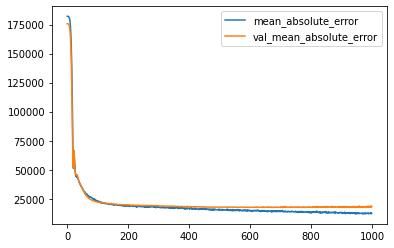

In [134]:
history_df.loc[:, ['mean_absolute_error', 'val_mean_absolute_error']].plot();
history_df['val_mean_absolute_error'].min()

In [83]:
pred= model_NN.predict(X_valid)

10/10 [==============================] - 0s 3ms/step


In [90]:
df = pd.DataFrame({'pred': pred.reshape(292,), 'y_valid': y_valid})

In [91]:
df

,pred,y_valid
Id,,
259,212460.718750,231500
268,176542.906250,179500
289,111712.070312,122000
650,88969.500000,84500
1234,133242.703125,142000
...,...,...
164,95744.117188,103200
48,234523.906250,249700
1433,112829.789062,64500
